<a href="https://colab.research.google.com/github/mafegomez-c/Laboratorio-fisica-moderna/blob/main/Doble_rendija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [4]:
excel_path ="/content/Doble rendija.final.xlsx"
sheet_names = pd.ExcelFile(excel_path).sheet_names

hoja_una_rendija = pd.read_excel(excel_path, sheet_name=sheet_names[0])
hoja_doble_rendija = pd.read_excel(excel_path, sheet_name=sheet_names[1])

hoja_una_rendija.head(), hoja_doble_rendija.head()

(   Distancia  Voltaje
 0          0    0.082
 1        100    0.083
 2        200    0.084
 3        300    0.085
 4        400    0.087,
    Distancia  Voltaje
 0          0     0.17
 1         20     0.17
 2         40     0.16
 3         60     0.16
 4         80     0.16)

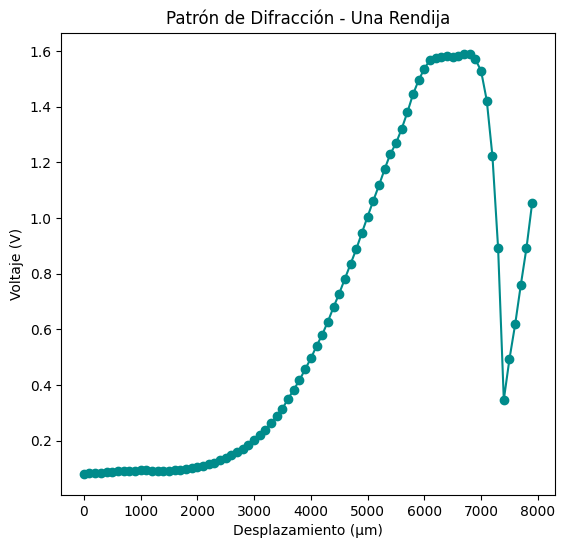

In [5]:
hoja_una_rendija['Distancia_μm'] = hoja_una_rendija['Distancia']
hoja_doble_rendija['Distancia_μm'] = hoja_doble_rendija['Distancia']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(hoja_una_rendija['Distancia_μm'], hoja_una_rendija['Voltaje'], color='darkcyan', marker='o', linestyle='-')
plt.title('Patrón de Difracción - Una Rendija')
plt.xlabel('Desplazamiento (μm)')
plt.ylabel('Voltaje (V)')
plt.grid(False)


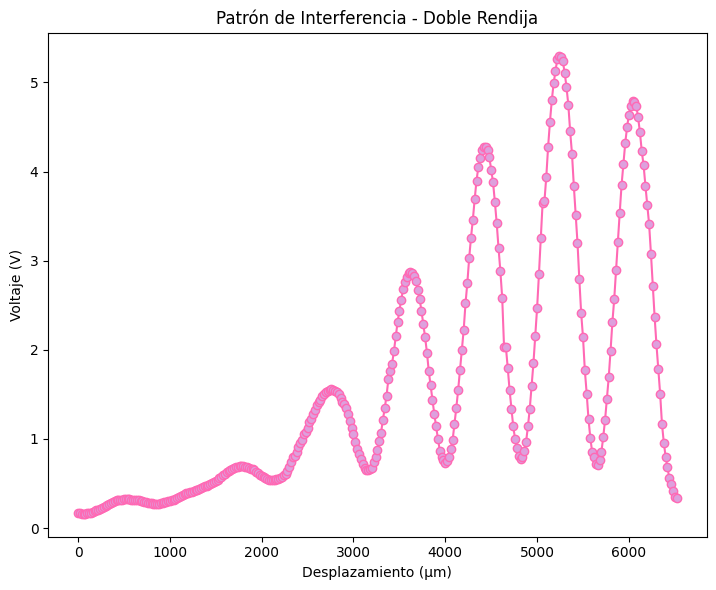

In [6]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
hoja_doble_rendija_filtrada = hoja_doble_rendija[hoja_doble_rendija['Distancia_μm'] <= 6520]

plt.plot(hoja_doble_rendija_filtrada['Distancia_μm'], hoja_doble_rendija_filtrada['Voltaje'], color='hotpink', marker='o', markerfacecolor='plum', linestyle='-')
plt.title('Patrón de Interferencia - Doble Rendija')
plt.xlabel('Desplazamiento (μm)')
plt.ylabel('Voltaje (V)')
plt.grid(False)

plt.tight_layout()
plt.show()


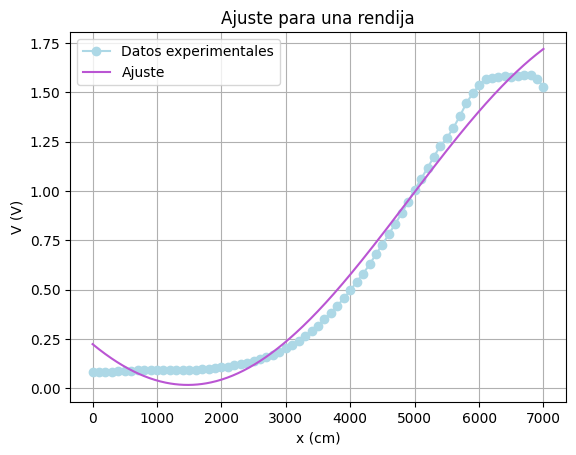

Parámetros del ajuste: Amplitid de la curva= 1.8712846564837742
Frecuencia espacial= 0.00022937840196568955
Desplazamiento horizontal = 1.2318863943823695, offset= 0.017119601860037605


In [23]:
df1 = pd.read_excel(excel_path, sheet_name=0)
df2 = pd.read_excel(excel_path, sheet_name=1)

df1.columns = ['x', 'V']
df2.columns = ['x', 'V']

df1_filtrado = df1[df1['x'] <= 7000]


x_data = df1_filtrado['x'].values
y_data = df1_filtrado['V'].values

def single_slit_model(x, A, B, C, D):
    return A * np.cos(B * x + C)**2 + D
p0 = [20, 0.0005, 0, 80]

params, _ = curve_fit(single_slit_model, x_data, y_data, p0)


params, _ = curve_fit(single_slit_model, x_data, y_data, p0)
A_fit, B_fit, C_fit, D_fit = params

x_fit = np.linspace(min(x_data), max(x_data), 500)
y_fit = single_slit_model(x_fit, *params)

plt.plot(x_data, y_data,color="lightblue", marker='o', label='Datos experimentales')
plt.plot(x_fit, y_fit, color="mediumorchid", linestyle='-', label='Ajuste')
plt.xlabel('x (cm)')
plt.ylabel('V (V)')
plt.title('Ajuste para una rendija')
plt.legend()
plt.grid(True)
plt.show()

print(f"Parámetros del ajuste: Amplitid de la curva= {A_fit}")
print(f"Frecuencia espacial= {B_fit}")
print(f"Desplazamiento horizontal = {C_fit}, offset= {D_fit}")

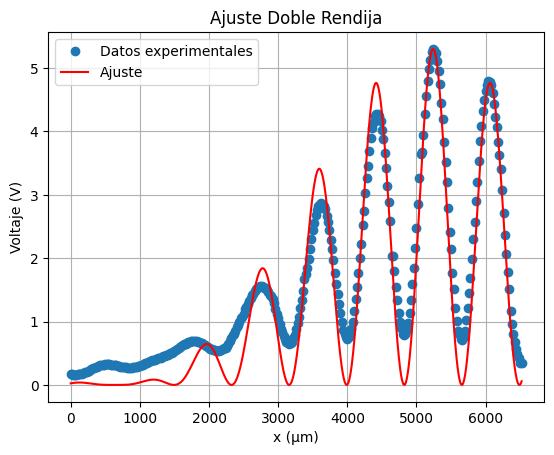

Ajuste:
A = 5.302, D = -0.003773, C = -0.000679, x₀ = 5239.77


In [16]:
def double_slit_model(x, A, D, C, x0):
    return A * (np.cos(D * (x - x0))**2) * (np.sinc(C * (x - x0) / np.pi)**2)
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

x_data = hoja_doble_rendija_filtrada['Distancia_μm'].values
y_data = hoja_doble_rendija_filtrada['Voltaje'].values

A0 = max(y_data)
D0 = 0.0005
C0 = 0.00005
x0 = np.mean(x_data)

popt, _ = curve_fit(double_slit_model, x_data, y_data, p0=[A0, D0, C0, x0])
A_fit, D_fit, C_fit, x0_fit = popt

x_fit = np.linspace(min(x_data), max(x_data), 1000)
y_fit = double_slit_model(x_fit, *popt)

plt.plot(x_data, y_data, 'o', label='Datos experimentales')
plt.plot(x_fit, y_fit, 'r-', label='Ajuste')
plt.title('Ajuste Doble Rendija')
plt.xlabel('x (μm)')
plt.ylabel('Voltaje (V)')
plt.legend()
plt.grid(True)
plt.show()


print(f"Ajuste:\nA = {A_fit:.3f}, D = {D_fit:.6f}, C = {C_fit:.6f}, x₀ = {x0_fit:.2f}")


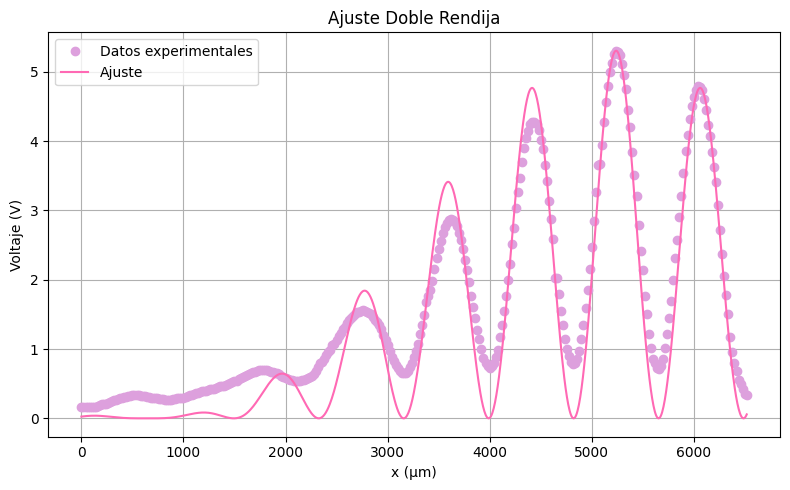

Parámetros ajustados:
A  = 5.302
D  = 3.773e+03 rad/m
C  = 6.795e+02 rad/m
x₀ = 5239.77 μm


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def double_slit_model(x, A, D, C, x0):
    x_m = (x - x0) * 1e-6
    return A * (np.cos(D * x_m)**2) * (np.sinc(C * x_m / np.pi)**2)

x_data = hoja_doble_rendija_filtrada['Distancia_μm'].values
y_data = hoja_doble_rendija_filtrada['Voltaje'].values

λ = 680e-9
d =2.6e-4
a = 0.0001
L = 1.0

D0 = np.pi * d / (λ * L)
C0 = np.pi * a / (λ * L)

A0 = max(y_data)
x0 = np.mean(x_data)
p0 = [A0, D0, C0, x0]

params, _ = curve_fit(double_slit_model, x_data, y_data, p0=p0)
A_fit, D_fit, C_fit, x0_fit = params

x_fit = np.linspace(min(x_data), max(x_data), 1000)
y_fit = double_slit_model(x_fit, *params)

plt.figure(figsize=(8, 5))
plt.plot(x_data, y_data, 'o', label='Datos experimentales', color='plum')
plt.plot(x_fit, y_fit, '-', label='Ajuste', color='hotpink')
plt.title('Ajuste Doble Rendija')
plt.xlabel('x (μm)')
plt.ylabel('Voltaje (V)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Parámetros ajustados:")
print(f"A  = {A_fit:.3f}")
print(f"D  = {D_fit:.3e} rad/m")
print(f"C  = {C_fit:.3e} rad/m")
print(f"x₀ = {x0_fit:.2f} μm")


Nombres de columnas disponibles: Index(['Distancia', 'Voltaje'], dtype='object')


Columnas hoja doble rendija: Index(['Distancia', 'Voltaje'], dtype='object')
Columnas hoja una rendija: Index(['Distancia', 'Voltaje'], dtype='object')


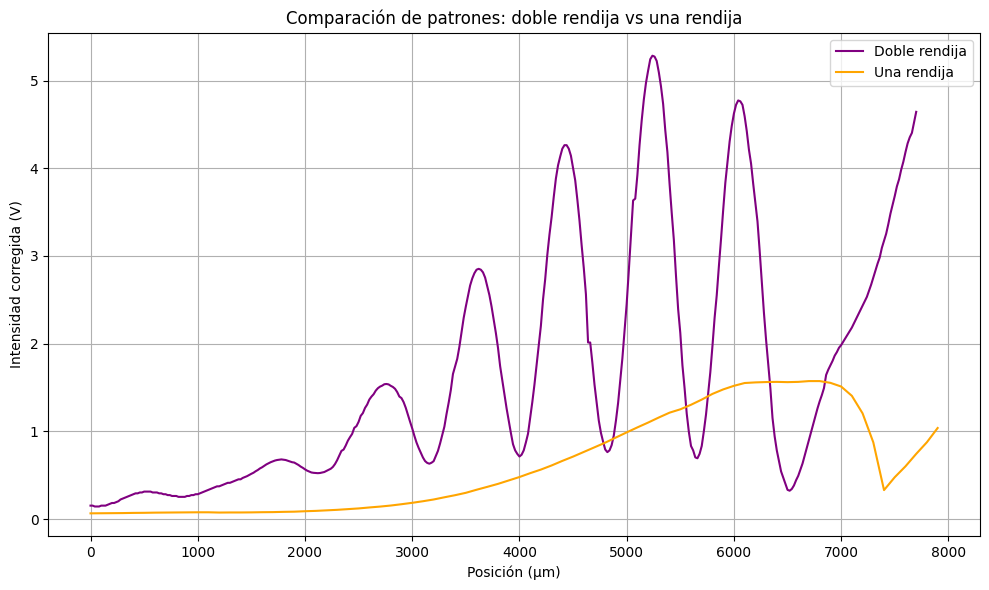

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

offset = 0.0171

df_doble = pd.read_excel("Doble rendija.final.xlsx", sheet_name="Dos rendijas")
df_simple = pd.read_excel("Doble rendija.final.xlsx", sheet_name="Una rendija")

print("Columnas hoja doble rendija:", df_doble.columns)
print("Columnas hoja una rendija:", df_simple.columns)

x_doble = df_doble["Distancia"]
I_doble = df_doble["Voltaje"] - offset

x_simple = df_simple["Distancia"]
I_simple = df_simple["Voltaje"] - offset

plt.figure(figsize=(10, 6))
plt.plot(x_doble, I_doble, label="Doble rendija", color='purple')
plt.plot(x_simple, I_simple, label="Una rendija", color='orange')
plt.xlabel("Posición (μm)")
plt.ylabel("Intensidad corregida (V)")
plt.title("Comparación de patrones: doble rendija vs una rendija")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
